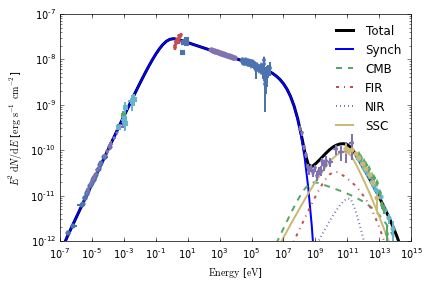

In [1]:
import numpy as np
from astropy.io import ascii
from astropy.constants import c
import astropy.units as u
import naima
from naima.models import (ExponentialCutoffBrokenPowerLaw, Synchrotron,
                          InverseCompton)

%matplotlib inline

ECBPL = ExponentialCutoffBrokenPowerLaw(amplitude=3.699e36 / u.eV,
                                        e_0=1 * u.TeV,
                                        e_break=0.265 * u.TeV,
                                        alpha_1=1.5,
                                        alpha_2=3.233,
                                        e_cutoff=1863 * u.TeV,
                                        beta=2.)

eopts = {'Eemax': 50 * u.PeV, 'Eemin': 0.1 * u.GeV}

SYN = Synchrotron(ECBPL, B=125 * u.uG, Eemax=50 * u.PeV, Eemin=0.1 * u.GeV)

# Compute photon density spectrum from synchrotron emission assuming R=2.1 pc
Rpwn = 2.1 * u.pc
Esy = np.logspace(-7, 9, 100) * u.eV
Lsy = SYN.flux(Esy, distance=0 * u.cm)  # use distance 0 to get luminosity
phn_sy = Lsy / (4 * np.pi * Rpwn**2 * c) * 2.24

IC = InverseCompton(ECBPL,
                    seed_photon_fields=['CMB',
                                        ['FIR', 70 * u.K, 0.5 * u.eV / u.cm**3],
                                        ['NIR', 5000 * u.K, 1 * u.eV / u.cm**3],
                                        ['SSC', Esy, phn_sy]],
                    Eemax=50 * u.PeV, Eemin=0.1 * u.GeV)

# Use plot_data from naima to plot the observed spectra
data = ascii.read('/home/giacomov/software/naima/examples/CrabNebula_spectrum.ecsv')
figure = naima.plot_data(data, e_unit=u.eV)
ax = figure.axes[0]

# Plot the computed model emission
energy = np.logspace(-7, 15, 100) * u.eV

y = IC.sed(energy, 2 * u.kpc) + SYN.sed(energy, 2 * u.kpc)

ax.loglog(energy.value, y.value,
          lw=3, c='k', label='Total')

ax.loglog(energy.value, SYN.sed(energy, 2 * u.kpc).value, lw=2,c='blue',label='Synch')

for i, seed, ls in zip(
        range(4), ['CMB', 'FIR', 'NIR', 'SSC'], ['--', '-.', ':', '-']):
    ax.loglog(energy.value, IC.sed(energy, 2 * u.kpc, seed=seed).value,
              lw=2, c=naima.plot.color_cycle[i + 1], label=seed, ls=ls)


ax.set_ylim(1e-12, 1e-7)
ax.legend(loc='upper right', frameon=False)
figure.tight_layout()

(1e-12, 1e+56)

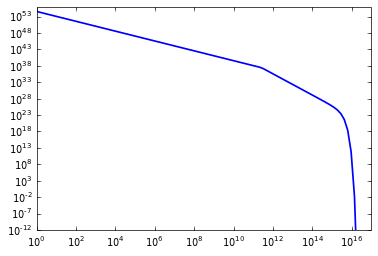

In [14]:
import matplotlib.pyplot as plt

energies = np.logspace(0,17,100)

plt.loglog(energies,ECBPL(energies * u.eV).value)

plt.ylim([1e-12,1e56])

In [16]:
ECBPL(energies * u.eV)

<Quantity [  3.69900000e+054,  2.04413029e+054,  1.12962115e+054,
             6.24247855e+053,  3.44969978e+053,  1.90636275e+053,
             1.05348847e+053,  5.82175639e+052,  3.21720156e+052,
             1.77788028e+052,  9.82486871e+051,  5.42938949e+051,
             3.00037294e+051,  1.65805710e+051,  9.16270544e+050,
             5.06346681e+050,  2.79815785e+050,  1.54630960e+050,
             8.54516976e+049,  4.72220609e+049,  2.60957137e+049,
             1.44209351e+049,  7.96925392e+048,  4.40394521e+048,
             2.43369500e+048,  1.34490123e+048,  7.43215288e+047,
             4.10713404e+047,  2.26967210e+047,  1.25425939e+047,
             6.93125065e+046,  3.83032695e+046,  2.11670380e+046,
             1.16972651e+046,  6.46410755e+045,  3.57217574e+045,
             1.97404505e+045,  1.09089085e+045,  6.02844834e+044,
             3.33142305e+044,  1.84100102e+044,  1.01736846e+044,
             5.62215110e+043,  3.10689628e+043,  1.71692371e+043,
          